In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -qr yolov5/requirements.txt
%cd yolov5

import torch
from IPython.display import Image, clear_output
from utils.google_utils import gdrive_download

clear_output()

In [ ]:
%time
!uptime

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.29 µs
 07:13:41 up 2 min,  0 users,  load average: 0.32, 0.17, 0.06


In [ ]:
#https://drive.google.com/file/d/1ib08pkQd45pB7B7xTM395ZY8z9-G638M/view?usp=sharing
from IPython.display import clear_output
## 15F1j6k1pRka856N7dZz2MP1i0mv8IaOKp;
%cd /content/yolov5/data
!gdown --id 1ib08pkQd45pB7B7xTM395ZY8z9-G638M
!unzip traffic-yolov5.zip; rm traffic-yolov5.zip;
clear_output()

In [ ]:
!mv /content/yolov5/data/custom_yolov5x.yaml /content/yolov5/models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/yolov3/backup/train.py' /content/yolov5

In [ ]:
#%cd /content
%%writefile /content/yolov5/data/data.yaml
train: /content/yolov5/data/train/images
val: /content/yolov5/data/valid/images

# number of classes
nc: 21
# class names
names: ['ambulance', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'army vehicle', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers (CNG)', 'truck', 'van', 'wheelbarrow']

Overwriting /content/yolov5/data/data.yaml


In [ ]:
%cat data.yaml

train: /content/yolov5/data/train/images
val: /content/yolov5/data/valid/images

# number of classes
nc: 21
# class names
names: ['ambulance', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'army vehicle', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers (CNG)', 'truck', 'van', 'wheelbarrow']

# **Edit yolov5(type).yaml**

nc: (Number of class in your custom dataset)

In [ ]:
%cat /content/yolov5/models/yolov5l.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1,

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5l.yaml

# parameters
nc: 21  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5l.yaml


# parameters
nc: 21  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[

# **Step 4: Train yolov5 on the custom images using the custom configuration file**

**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

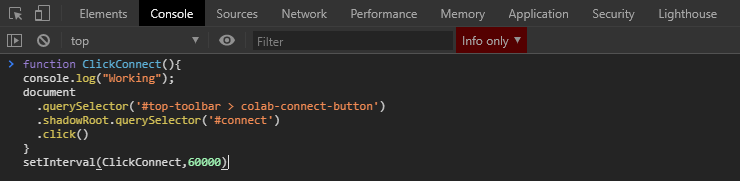

In [ ]:
#https://drive.google.com/file/d/1FhwBnstKITn3jLNALYrEsNTkmxLUUQzb/view?usp=sharing

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
#!python train.py --resume '/content/drive/My Drive/yolov3/backup/exp4_yolov5x_results/weights/best.pt'

!python train.py --img 416 --batch 16 --epochs 2000 --data '/data.yaml' --cfg ./models/custom_yolov5l.yaml --weights 'weights/yolov5l.pt' --name yolov5l_results  --cache

/content/yolov5
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/custom_yolov5l.yaml', data='./data/data.yaml', device='', epochs=2000, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, logdir='/content/sample_data', multi_scale=False, name='yolov5l_results', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='weights/yolov5l.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-11-11 07:34:56.192260: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5,

In [ ]:
%cd /content/yolov5
!python test.py --weights '/content/drive/My Drive/yolov3/backup/exp4_yolov5x_results/weights/best.pt' --data data.yaml --img 640 --conf 0.40

/content/yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.4, data='./data/data.yaml', device='', img_size=640, iou_thres=0.65, name='', save_conf=False, save_dir='runs/test', save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['/content/drive/My Drive/yolov3/backup/exp4_yolov5x_results/weights/best.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Fusing layers... 
Model Summary: 284 layers, 8.85252e+07 parameters, 0 gradients
Scanning labels /content/yolov5/data/valid/labels.cache (600 found, 0 missing, 0 empty, 0 duplicate, for 600 images): 600it [00:00, 17540.70it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 19/19 [00:26<00:00,  1.41s/it]
                 all         600    4.87e+03       0.671       0.634       0.786       0.581
Speed: 33.2/1.3/34.5 ms inference/NMS/total per 640x640 image at batch-size 32
Results saved to runs/test/exp1


In [ ]:
%cd /content/yolov5
!python detect.py --weights 'runs/exp0_yolov5x_results/weights/best.pt' --img 1024 --conf 0.4 --source /content/yolov5/data/test

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=1024, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='/content/yolov5/data/test', update=False, view_img=False, weights=['runs/exp0_yolov5x_results/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... 
Model Summary: 284 layers, 8.85252e+07 parameters, 0 gradients
image 1/500 /content/yolov5/data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 2 cars, 1 minivans, 3 motorbikes, 1 pickups, 1 trucks, Done. (0.100s)
image 2/500 /content/yolov5/data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 3 buss, 4 cars, 2 minivans, 3 motorbikes, 1 vans, 1 wheelbarrows, Done. (0.063s)
image 3/500 /content/yolov5/data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 1 bicycles, 1 buss, 2 cars, 3 motorbikes, 1 pickups, Done. (0.063

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/output/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# **Download the result**

In [ ]:
from IPython.display import Image, display
from google.colab import files

for imageName in glob.glob('/content/yolov5/inference/output/*.jpg'):
    #display(Image(filename=imageName))
    #print("\n")
    files.download(filename=imageName)

For testing

In [ ]:
import argparse
import os
import shutil
import time
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import (
    check_img_size, non_max_suppression, apply_classifier, scale_coords,
    xyxy2xywh, plot_one_box, strip_optimizer, set_logging)
from utils.torch_utils import select_device, load_classifier, time_synchronized


def detect(save_img=False):
    out, source, weights, view_img, save_txt, imgsz = \
        opt.output, opt.source, opt.weights, opt.view_img, opt.save_txt, opt.img_size

    # Initialize
    set_logging()
    device = select_device(opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder
    half = device.type != 'cpu'  # half precision only supported on CUDA

    # Load model
    model = attempt_load(weights, map_location=device)  # load FP32 model
    imgsz = check_img_size(imgsz, s=model.stride.max())  # check img_size
    if half:
        model.half()  # to FP16

    # Second-stage classifier
    classify = False
    if classify:
        modelc = load_classifier(name='resnet101', n=2)  # initialize
        modelc.load_state_dict(torch.load('weights/resnet101.pt', map_location=device)['model'])  # load weights
        modelc.to(device).eval()

    # Set Dataloader
    vid_path, vid_writer = None, None
    save_img = True
    dataset = LoadImages(source, img_size=imgsz)

    # Get names and colors
    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
    _ = model(img.half() if half else img) if device.type != 'cpu' else None  # run once

    results=[]
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = time_synchronized()
        pred = model(img, augment=opt.augment)[0]

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres, classes=opt.classes, agnostic=opt.agnostic_nms)
        t2 = time_synchronized()

        # Apply Classifier
        if classify:
            pred = apply_classifier(pred, modelc, img, im0s)

        # Process detections
        for i, det in enumerate(pred):  # detections per image
            p, s, im0 = path, '', im0s

            save_path = str(Path(out) / Path(p).name)
            txt_path = str(Path(out) / Path(p).stem) + ('_%g' % dataset.frame if dataset.mode == 'video' else '')
            s += '%gx%g ' % img.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            if det is not None and len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string
                xmin = []
                ymin = []
                xmax = []
                ymax = []
                scores = []
                labels_value=[]
                image_ids=[]
                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file

                        conf_score = '%.2f' % (conf)
                        label_with_cls = '%s' % (names[int(cls)])
                        
                        labels_value.append(label_with_cls)
                        
                        xmin.append(int(xyxy[0]))
                        ymin.append(int(xyxy[1]))
                        xmax.append(int(xyxy[2]))
                        ymax.append(int(xyxy[3]))
                        
                        scores.append(conf_score)
                        image_ids.append(save_path)
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, conf, *xywh) #if opt.save_conf else (cls, *xywh)  # label format
                        with open(save_path[:save_path.rfind('.')] + '.txt', 'a') as file:
                             file.write(('%g ' * len(line) + '\n') % line)  # label format

                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=3)

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))

            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)

        result = {
            'image_id': image_ids,
            'score': scores,
            'class': labels_value,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
            }
        results.append(result)

    if save_txt or save_img:
        print('Results saved to %s' % Path(out))

    print('Done. (%.3fs)' % (time.time() - t0))
    return results


In [ ]:
class opt:
    cfg='/content/yolov5/models/custom_yolov5x.yaml'
    names='/content/yolov5/data/metadata/traffic.names'
    weights='/content/drive/My Drive/yolov3/backup/exp4_yolov5x_results/weights/last.pt'
    source='/content/yolov5/data/test'#Check it
    save_txt=True
    output='output'
    classes=False
    img_size=1024
    conf_thres=0.3
    iou_thres=0.6
    fourcc='mp4v'
    half=False
    device=''
    view_img=False
    agnostic_nms=False
    augment=False

In [ ]:
# predict results
with torch.no_grad():
    res=detect()

Using torch 1.7.0+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)



Fusing layers... 


Model Summary: 284 layers, 8.85252e+07 parameters, 0 gradients


image 1/500 /content/yolov5/data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 2 buss, 2 cars, 1 minivans, 3 motorbikes, 2 pickups, 1 trucks, Done. (0.094s)
image 2/500 /content/yolov5/data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 4 buss, 5 cars, 3 minivans, 3 motorbikes, 2 suvs, Done. (0.086s)
image 3/500 /content/yolov5/data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 1 bicycles, 3 buss, 1 cars, 3 minivans, 3 motorbikes, 1 pickups, 1 vans, Done. (0.085s)
image 4/500 /content/yolov5/data/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg: 1024x1024 2 buss, 4 cars, 3 minivans, 1 pickups, 2 three wheelers (CNG)s, 1 trucks, Done. (0.085s)
image 5/500 /content/yolov5/data/test/Sabiha_(10)_jpg.rf.d163e2a53d5ed22112e9ead62807acf4.jpg: 1024x1024 1 buss, 8 cars, 2 minivans, 1 rickshaws, 6 three wheelers (CNG)s, Done. (0.085s)
image 6/500 /content/yolov5/data/test/Sabiha_(11)_jpg.rf.36299290e6d6ce12423051e1f5

In [ ]:
import pandas as pd
import numpy as np

append_data=[]

for i in range(len(res)):
  
  df = pd.DataFrame(res[i], columns = ['image_id','class','score','xmin','ymin','xmax','ymax'])
 
  append_data.append(df)

finl_results=pd.concat(append_data)

finl_results.image_id = [x.strip('output/') for x in finl_results.image_id]

finl_results['width'] = 1024
finl_results['height'] = 1024

In [ ]:
finl_results

,image_id,class,score,xmin,ymin,xmax,ymax,width,height
0,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,pickup,0.31,782,522,1021,896,1024,1024
1,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,bus,0.35,534,670,576,744,1024,1024
2,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,motorbike,0.79,500,703,515,741,1024,1024
3,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,car,0.81,522,686,538,726,1024,1024
4,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,motorbike,0.85,463,710,486,767,1024,1024
...,...,...,...,...,...,...,...,...,...
3,sabiha(309)_jpg.rf.93e77c106e2f415529533bacade...,motorbike,0.87,312,764,326,813,1024,1024
4,sabiha(309)_jpg.rf.93e77c106e2f415529533bacade...,van,0.89,56,675,232,975,1024,1024
5,sabiha(309)_jpg.rf.93e77c106e2f415529533bacade...,car,0.91,616,778,656,826,1024,1024
6,sabiha(309)_jpg.rf.93e77c106e2f415529533bacade...,bus,0.91,868,706,1024,883,1024,1024


In [ ]:
finl_results.to_csv('/content/11novsubmission.csv', index=False)

In [ ]:
# thank you